In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Dropout, Flatten

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def process_training_data():
    data = pd.read_csv('leafsnap-dataset-images.txt', delimiter='\t')
    return data   


In [4]:
data = pd.DataFrame(process_training_data())
data.head()
classes = len(data['species'].unique())

In [5]:
data = data.drop(['image_path','source'],axis=1)
data.head()

,file_id,segmented_path,species
0,55497,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor
1,55498,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor
2,55499,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor
3,55500,dataset/segmented/lab/abies_concolor/ny1157-01...,Abies concolor
4,55501,dataset/segmented/lab/abies_concolor/ny1157-02...,Abies concolor


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data = shuffle(data)
train_X, test_X, train_y, test_y = train_test_split(data['segmented_path'], data['species'], test_size = 0.2, random_state = 0)

print(train_X.head())
print(train_y.head())

17819    dataset/segmented/lab/quercus_alba/pi2317-06-3...
6554     dataset/segmented/lab/cornus_florida/wb8003-04...
24847    dataset/segmented/field/chionanthus_virginicus...
6044     dataset/segmented/lab/chamaecyparis_pisifera/n...
3805     dataset/segmented/lab/broussonettia_papyrifera...
Name: segmented_path, dtype: object
17819                Quercus alba
6554               Cornus florida
24847      Chionanthus virginicus
6044       Chamaecyparis pisifera
3805     Broussonettia papyrifera
Name: species, dtype: object


In [7]:
import glob, cv2

training_images = []
for img in train_X:
    leaf = cv2.resize(cv2.imread(img), (100, 100))
    training_images.append(leaf)

testing_images = []
for img in test_X:
    leaf = cv2.resize(cv2.imread(img), (100, 100))
    testing_images.append(leaf)


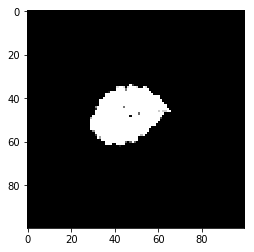

In [8]:
import random

leaf = random.choice(training_images)

plt.imshow(leaf)

In [30]:
model = Sequential()

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())
model.add(Dense(classes,input_shape=(1,),activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        18464     
_________________________________________________________________
average_pooling2d_9 (Average (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16928)             0         
_________________________________________________________________
den

In [14]:
training_images = np.array(training_images)
testing_images = np.array(testing_images)
training_images.shape

(24692, 100, 100, 3)

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [27]:
test_y

array([ 35, 103,  76, ..., 157, 158,  64])

In [31]:
model.fit(training_images, train_y, validation_data=(testing_images, test_y),epochs=3)

Train on 24692 samples, validate on 6174 samples
Epoch 1/3
15424/24692 [=================>............] - ETA: 528s - loss: 4.3452 - acc: 0.1341

KeyboardInterrupt: 

In [33]:
model.evaluate(testing_images,test_y)

6174/6174 [==============================] - 127s   


[3.806915161638226, 0.1977648202475893]